<a href="https://colab.research.google.com/github/SERVIR/ForestStandHeight/blob/master/ADPC_Workshop_Jan2020/1_Apply_FSH_Algorithm_Maine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apply Forest Stand Height (FSH) Algorithm

In this Colaboratory we will run the Forest Stand Height (FSH) Python Scripts on preprocessed ALOS PALSAR scenes over central Maine, US. These scripts were created by Paul Siquiera and Lei Yang. 

##Useful links:

*   [Lei Yang's GitHub](https://github.com/leiyangleon/FSH)
*   [SERVIR Global's FSH GitHub page](https://github.com/SERVIR/ForestStandHeight)
*   [SAR Handbook](https://servirglobal.net/Global/Articles/Article/2674/sar-handbook-comprehensive-methodologies-for-forest-monitoring-and-biomass-estimation)
* [Input Data & Expected Outputs](https://drive.google.com/open?id=1n2kbQUlbzX98qHj1DUJqThTJJc5-RVNd)




## **(1) Mounting your Google Drive**
In order to access your Google Drive and all of the files stored within from the colab, you need to mount your drive. When you run the following code, you will be prompted to authorize your Google account. In this section, you are also creating a symbolic pathname `content/notebooks` that represents `content/mnt/My Drive/Colab Notebooks` to circumvent issues arising from the space in `My Drive`.

<img src="http://icons.iconarchive.com/icons/marcus-roberto/google-play/256/Google-Drive-icon.png">

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

## **(2) Install Required Python Libraries**
*   [mpmath](http://mpmath.org/) - for real and complex floating-point arithmetic
*   [simplekml](https://simplekml.readthedocs.io/en/latest/) - to create kml files



In [0]:
!pip install mpmath simplekml

## **(3) Create FSH Folder**


The next code block creates a folder named `FSH` within your `Colab Notebooks` folder on your Google Drive. The FSH scripts and outputs from these scripts will all be stored within the `FSH` folder. 

In [0]:
%cd /content/notebooks/
!mkdir FSH

## **(4) Add the FSH Python Scripts to your Google Drive**


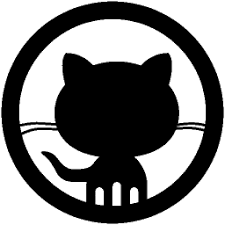

Use the change directory command below to move your current working directory to be the `FSH` folder that you created in the previous step.

In [0]:
%cd /content/notebooks/FSH

Run the code block below to clone the FSH scripts from the GitHub repository to the FSH folder on your Google Drive. 

Please note: Once the scripts updated to Python 3 are hosted on Lei Yang's GitHub, the following line will clone from there instead.  

In [0]:
!git clone https://github.com/MayerT1/FSH_Python3.git

## **(5) Add the Example Data to your Google Drive**


<img src="http://icons.iconarchive.com/icons/marcus-roberto/google-play/256/Google-Drive-icon.png">

Example data for central Maine, US, has already been processed in [ISCE](https://github.com/isce-framework/isce2) (InSAR Scientific Computing Environment). In order to run the FSH scripts on the preprocessed data, the data needs to be added to your Google Drive. Follow the steps below to add the preprocessed ALOS PALSAR data into a folder called `FSH_data`. 



(5.1) Make the `FSH_data` folder.

In [0]:
!mkdir FSH_data

(5.2) Navigate into the `FSH_data` folder.

In [0]:
%cd /content/notebooks/FSH/FSH_data

(5.3) Follow the link to the [Exercise 1 FSH_data folder](https://drive.google.com/file/d/0B6s-Z6YH5T12Q2g0cWprSUtiMDA/view).

(5.4) Download and unzip the files, add the files to your Google Drive as shown below.
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQjepchRFI0p8FCWX-CbZsmpMNkCMBFWTIxjd083dbVKD8FgyL2sj8YiE-PUb7a5Q0j0fT82vRfXxUN/pub?w=1440&amp;h=1332">

(5.5) Check that your files are within the directory `My Drive/Colab Notebooks/FSH/FSH_data` 
<img src="https://docs.google.com/drawings/d/e/2PACX-1vRDtq5TrgugRABzPbRTpoa9DB1SbjdvGKRPLaC18U8tuIZXceGVzCy3_nNTvRXEVKRUJiWILR49t2sn/pub?w=506&amp;h=512">

## **(6) Run the Forest Stand Height Scripts**  

<img src="https://i.pinimg.com/originals/67/19/0b/67190b2076ccdf40951b613878e6bdf8.png">


Navigate to the `FSH_Python3` folder where the FSH scripts are stored. 

In [0]:
%cd /content/notebooks/FSH/FSH_Python3

The scripts shown below are all called by `forest_stand_height.py`

In [0]:
!ls

Use the following code block to call the main `forest_stand_height.py` script.

In [0]:
!python /content/notebooks/FSH/FSH_Python3/forest_stand_height.py 3 2 2 5 "linkfile.txt" "flagfile.txt" "Howland_LVIS_NaN.tif" "Maine_NLCD2011_nonwildland.tif" /content/notebooks/FSH/FSH_data/ "gif json kml mat tif" --flag_diff=1 --flag_error=1  --flag_proc=1

**What does this command mean?** See the figures below to break down each part of this command while your scripts run. They should complete in around 20 minutes. 

![alt text](![alt text](https://))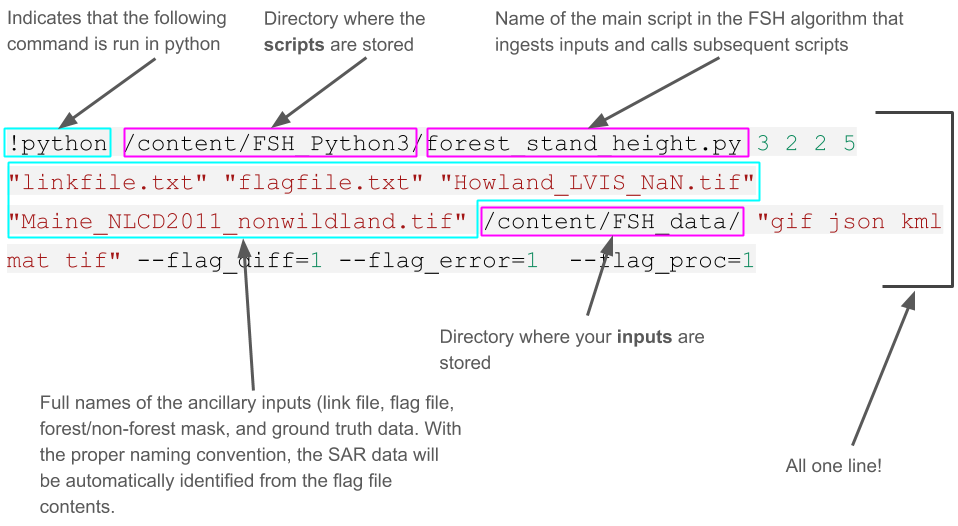




## **(7) Create a Mosaic of Estimated FSH**

Run the following code block to create a mosaic of the three forest stand height estimation maps, one that was created for each input interferogram.

In [0]:
!python /content/notebooks/FSH/FSH_Python3/create_mosaic.py "/content/notebooks/FSH/FSH_data/" "3sc_mosaic.tif" "/content/notebooks/FSH/FSH_data/f890_o118/890_118_20070808_HV_20070923_HV_fsh.tif /content/notebooks/FSH/FSH_data/f890_o119/890_119_20070710_HV_20071010_HV_fsh.tif /content/notebooks/FSH/FSH_data/f890_o120/890_120_20070727_HV_20070911_HV_fsh.tif"

## **(8) View Outputs**

Download and open the forest stand height output, which can be found in the directory `/content/notebooks/FSH/FSH_data3sc_mosaic.tif`, 
in QGIS or other software. The error metrics can be found in the output folder, along with intermediate outputs. The forest stand height difference map (central scene only) and individual forest stand height maps can be found in the respective folder for that frame and orbit input pair.

Also all outputs can be found [here](https://drive.google.com/open?id=1djhjkvssKHJWE1YSCKTNCTzai29wMA_c)
![](https://drive.google.com/uc?export=view&id=17b7-oSMPN8U353i0Gj4INP-3rGrs_jQN)

<img src="https://sa1-api.asm.skype.com/v1/objects/0-sa-d5-c8259b57346cde25735281e0418e25b0/views/imgpsh_fullsize_anim">

